I will be using a Linear Regression Model to predict the insurance dataset

Loading Dependencies

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

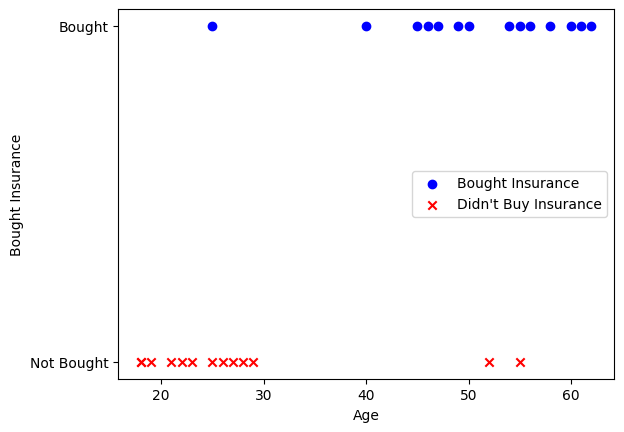

In [87]:
training_data = pd.read_csv("insurance_data.csv")

pos = training_data.bought_insurance == 1
neg = training_data.bought_insurance == 0

plt.scatter(training_data.age[pos], [1] * len(training_data.age[pos]), marker='o', c = 'b', label='Bought Insurance')
plt.scatter(training_data.age[neg], [0] * len(training_data.age[neg]), marker='x', c ='r',label="Didn't Buy Insurance")

plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.yticks([0, 1], ["Not Bought", "Bought"])
plt.legend()
plt.show()

In [126]:
X_train, x_test, y_train, y_test = train_test_split(training_data[["age"]], 
                                                    training_data[["bought_insurance"]], random_state = 1)


In [127]:
z = lambda w,x,b: w * x + b

g = lambda z: 1 / (1 + np.exp(-z))


In [128]:
def compute_gradient(x,y,w,b):
    dj_dw = 0.
    dj_db = 0.

    m = x.shape[0]

    for i in range(m):
        loss = g(z(w,x[i][0],b)) - y[i][0]
        dj_dw += loss * x[i][0]
        dj_db += loss

    return dj_dw / m , dj_db / m

In [129]:
def gradient_descent(x,y,w,b,nums_iter,alpha):
    for _ in range(nums_iter):
        dj_dw, dJ_db = compute_gradient(x,y,w,b)
        w -= alpha * dj_dw
        b -= alpha * dJ_db

    return w,b

In [130]:
fit = lambda X,y: gradient_descent(X.values,y.values,0.,0.,10000,0.01)

w,b = fit(X_train,y_train)

def predict(X):
    X = X.values
    m = X.shape[0]
    predictions = np.zeros(X.shape)

    for i in range(m):
        res  = g(z(w,X[i][0],b))
        predictions[i][0] = round(res) if res >= 0.5 else 0

    return predictions

print(1 - mean_absolute_error(y_test,predict(x_test)))

0.8571428571428572


In [131]:
model = LogisticRegression()

model.fit(X_train,y_train)
model.score(x_test,y_test)

c:\Users\olaoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8571428571428571